In [5]:
# Freeing CUDA memory: https://stackoverflow.com/questions/55322434/how-to-clear-cuda-memory-in-pytorch
import torch
from VRP_Net_L import VRPNet_L
from matplotlib import pyplot as plt
from utils import *
import os
import matplotlib.pyplot as plt
from torchinfo import summary
import numpy as np
from inference import inference

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

print("Running on: " , device)
num_data = 1 # number of FLPO instances
num_nodes = np.linspace(50,200,20) # number of facilities

city_dim = 2
Data_1 = []
Data_2 = []
Data_3 = []
Data_4 = []
for i in num_nodes:
    i = int(i)
    data = torch.rand(1,i,city_dim).to(device) # 1 drone
    Data_1.append(data)
    data = torch.rand(50,i,city_dim).to(device) # 50 drones
    Data_2.append(data)
    data = torch.rand(100,i,city_dim).to(device) # 100 drones
    Data_3.append(data)
    data = torch.rand(200,i,city_dim).to(device) # 200 drones
    Data_4.append(data)

Running on:  cuda


In [9]:
hidden_dim = 64
num_layers_enc = 6
num_layers_dec = 4
num_heads = 8
dropout = 0.1
input_dim = 2

vrpnet_L = VRPNet_L(input_dim, hidden_dim, device, num_layers_enc, num_layers_dec, num_heads, dropout=dropout)

vrpnet_L.eval()
print('VRP_L NET loaded.')
print(summary(vrpnet_L))


Model created.
VRP_L NET loaded.
Layer (type:depth-idx)                                                 Param #
VRPNet_L                                                               --
├─LinearAttnEncoder: 1-1                                               2,048
│    └─ModuleList: 2-1                                                 --
│    │    └─MultiheadAttention: 3-1                                    66,048
│    │    └─MultiheadAttention: 3-2                                    66,048
│    │    └─MultiheadAttention: 3-3                                    66,048
│    │    └─MultiheadAttention: 3-4                                    66,048
│    │    └─MultiheadAttention: 3-5                                    66,048
│    │    └─MultiheadAttention: 3-6                                    66,048
│    └─ModuleList: 2-2                                                 --
│    │    └─MultiheadAttention: 3-7                                    66,048
│    │    └─MultiheadAttention: 3-8        

# Calculating time for SNN

In [10]:
import time
from tqdm import tqdm
times_1_L=[]
times_2_L=[]
times_3_L=[]
times_4_L=[]
torch.cuda.empty_cache()
for data in tqdm(Data_1):
    s = time.time()
    with torch.no_grad():
        inference(data,vrpnet_L,'Greedy')
    times_1_L.append(time.time()-s)
    torch.cuda.empty_cache()
for data in tqdm(Data_2):
    s = time.time()
    with torch.no_grad():
        inference(data,vrpnet_L,'Greedy')
    times_2_L.append(time.time()-s)
    torch.cuda.empty_cache()
for data in tqdm(Data_3):
    s = time.time()
    with torch.no_grad():
        inference(data,vrpnet_L,'Greedy')
    times_3_L.append(time.time()-s)
    torch.cuda.empty_cache()
for data in tqdm(Data_4):
    s = time.time()
    with torch.no_grad():
        inference(data,vrpnet_L,'Greedy')
    times_4_L.append(time.time()-s)
    torch.cuda.empty_cache()

100%|██████████| 20/20 [00:34<00:00,  1.73s/it]


# Calculating time for Original Gibb's Distribution

In [11]:
times_1_F=[]
times_2_F=[]
times_3_F=[]
times_4_F=[]
torch.cuda.empty_cache()
for data in tqdm(Data_1):
    s = time.time()
    with torch.no_grad():
        generate_true_labels(data,1e8)
    times_1_F.append(time.time()-s)
    torch.cuda.empty_cache()
for data in tqdm(Data_2):
    s = time.time()
    with torch.no_grad():
        generate_true_labels(data,1e8)
    times_2_F.append(time.time()-s)
    torch.cuda.empty_cache()
for data in tqdm(Data_3):
    s = time.time()
    with torch.no_grad():
        generate_true_labels(data,1e8)
    times_3_F.append(time.time()-s)
    torch.cuda.empty_cache()
for data in tqdm(Data_4):
    s = time.time()
    with torch.no_grad():
        generate_true_labels(data,1e8)
    times_4_F.append(time.time()-s)
    torch.cuda.empty_cache()

100%|██████████| 20/20 [13:12<00:00, 39.64s/it]


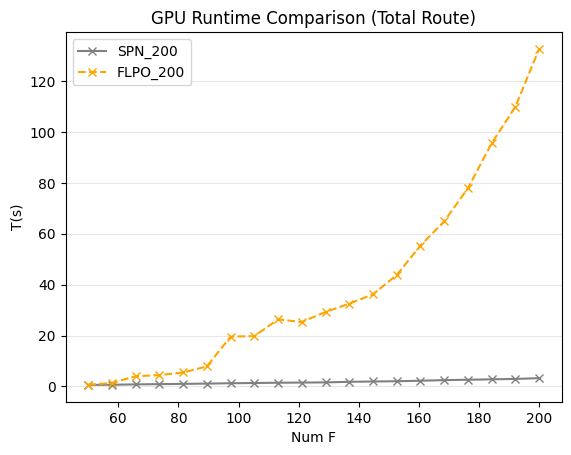

In [19]:
color1 = 'cyan'
color2 = 'gray'
color3 = 'orange'
linestyle1 = '--'
linestyle2 = '-'
linestyle3 = '--'

# plt.plot(num_nodes,times_1_L,linestyle2,marker='v',color=color2,label='SPN_1')
# plt.plot(num_nodes,times_2_L,linestyle2,marker='o',color=color2,label='SPN_50')
# plt.plot(num_nodes,times_3_L,linestyle2,marker='^',color=color2,label='SPN_100')
plt.plot(num_nodes,times_4_L,linestyle2,marker='x',color=color2,label='SPN_200')

# plt.plot(num_nodes,times_1_F,linestyle3,marker='v',color=color3,label='FLPO_1')
# plt.plot(num_nodes,times_2_F,linestyle3,marker='o',color=color3,label='FLPO_50')
# plt.plot(num_nodes,times_3_F,linestyle3,marker='^',color=color3,label='FLPO_100')
plt.plot(num_nodes,times_4_F,linestyle3,marker='x',color=color3,label='FLPO_200')

plt.legend()
# plt.yscale('log')
plt.xlabel('Num F')
plt.ylabel('T(s)')
plt.title('GPU Runtime Comparison (Total Route)')
# plt.yticks(np.linspace(0,35,15))
plt.grid(axis='y',alpha=0.3)